<a href="https://colab.research.google.com/github/jnunez03/Pandas_forDataAnalysis/blob/master/Helix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
from fbprophet import Prophet 


# re-run new query from ATOM/BQ.

q = """
SELECT
regi_id, 
product_code, 
mIN(case when is_sub = true then date(update_time) else null end) as NL_Sub_date,
max(case when is_sub = False then date(update_time) else null end) as NL_Unsub_date
FROM `nyt-messaging-prd.helix_email.email_user_subscriptions`
WHERE _PARTITIONTIME >= '2016-01-01 00:00:00' AND _PARTITIONTIME < '2019-09-25 00:00:00'
and product_code = 'CK'
group by 1,2
"""

df = pd.read_gbq(q,
    project_id = 'nyt-bigquery-beta-workspace',
    dialect='standard')

INFO:google.auth.compute_engine._metadata:Compute Engine Metadata server unavailable.
INFO:pandas_gbq.gbq:Requesting query... 
INFO:pandas_gbq.gbq:ok.
Query running...
INFO:pandas_gbq.gbq:Job ID: d538592b-690f-4429-bbcc-c53fb8ae5501
Query running...
INFO:pandas_gbq.gbq:  Elapsed 7.2 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 9.79 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 11.15 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 13.1 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 14.22 s. Waiting...
INFO:pandas_gbq.gbq:Got 5616651 rows.

INFO:pandas_gbq.gbq:Total time taken 329.92 s.
Finished at 2019-09-25 15:50:35.


In [24]:
# Now Run This Segment
#df.head(n=5)

#df['f0_'].str.len() # tells me how long each row is. 
df.head(n=40)




,regi_id,product_code,NL_Sub_date,NL_Unsub_date
0,95966264,CK,2019-08-26,2019-08-27
1,89529746,CK,2018-12-29,2019-08-27
2,91032993,CK,2019-03-21,2019-08-27
3,95902137,CK,2019-08-24,2019-08-27
4,94469074,CK,2019-07-27,2019-08-27
5,68184151,CK,2018-12-13,2019-08-27
6,88689902,CK,2019-07-10,2019-08-27
7,93899961,CK,2019-07-16,2019-08-27
8,96013511,CK,2019-08-26,2019-08-27
9,83790175,CK,2017-12-09,2019-08-27


In [0]:
#from google.colab import files
#df.to_csv('XWdata.csv') 
#files.download('XWdata.csv')

#df.dtypes  


# Drop values where we see 'None' 
df1 = df[df.NL_Sub_date != 'None']

df2 = df1[df1.NL_Unsub_date != 'None']



#df['NL_Sub_date'] = pd.to_datetime(df['NL_Sub_date'])



# Value_counts 
#print('Sub date Values...', df['NL_Sub_date'].value_counts())
#print('\n')
#print('Unsub date Values...', df['NL_Unsub_date'].value_counts())

#df['NL_Sub_date'] = pd.to_datetime(df['NL_Sub_date'])
#df['NL_Unsub_date'] = pd.to_datetime(df['NL_Unsub_date'])
#df[diff] = 

In [0]:
# Subscribed before January 2017

#df2.head(n=10)


df2['NL_Sub_date'] = pd.to_datetime(df2['NL_Sub_date'], errors='coerce')
df2['NL_Unsub_date'] = pd.to_datetime(df2['NL_Unsub_date'], errors='coerce')
# Changes out of bounds values to NaT  the -errors='coerce'

In [73]:
# Subscribed before January 2017

df3 = df2[df2.NL_Sub_date < '2017-01-01']
df3.head(n=15)
df3.length

AttributeError: ignored

In [74]:
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame
from pylab import *
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator
from matplotlib.font_manager import FontProperties
from scipy import stats
from scipy.stats import norm

#plt.style.use('fivethirtyeight')

plt.style.use('ggplot')


   # PLOTS
  
#df3.tail(n=15)
#df3.NL_Unsub_date.value_counts().plot(color='teal')
#df3.NL_Sub_date.value_counts().plot(color='teal')

#df3.head(n=10)

df3['Diff'] = (df3['NL_Unsub_date'] - df3['NL_Sub_date']).dt.days

#sb.distplot(df3['Diff'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [83]:
df3.head()
#df3.Diff.value_counts()
#df3.dropna()
#df3.Diff.head()



,regi_id,product_code,NL_Sub_date,NL_Unsub_date,Diff
36,70003589,CK,2014-10-15,2018-08-26,1411.0
40,67301490,CK,2016-11-14,2018-08-27,651.0
48,70024087,CK,2014-10-18,2018-08-27,1409.0
63,4929013,CK,2015-09-07,2018-08-27,1085.0
85,75942092,CK,2016-06-25,2018-08-27,793.0


In [77]:

df3 = df3.dropna()
#df3['Diff'] = df3['Diff'].astype('int')
df4 = df3[df3['NL_Unsub_date'] != '2018-12-20']
df4['NL_Unsub_date'].value_counts().describe()

count     600.000000
mean      137.895000
std       379.068673
min        13.000000
25%        71.000000
50%       109.500000
75%       146.000000
max      8290.000000
Name: NL_Unsub_date, dtype: float64

In [106]:
#df3.dtypes
df3.describe()
#sb.distplot(df3['Diff'])
#sb.distplot(df3['Diff'])



,regi_id,Diff
count,1.111470e+05,111147.000000
mean,6.254517e+07,1131.843702
std,1.790429e+07,321.851284
min,1.430000e+03,397.000000
25%,5.792981e+07,862.000000
50%,7.023802e+07,1106.000000
75%,7.396816e+07,1406.000000
max,7.837963e+07,2040.000000


In [0]:
# Account for day '2018-12-20'

df4 = df3[df3['NL_Unsub_date'] != '2018-12-20']

#df3.describe()

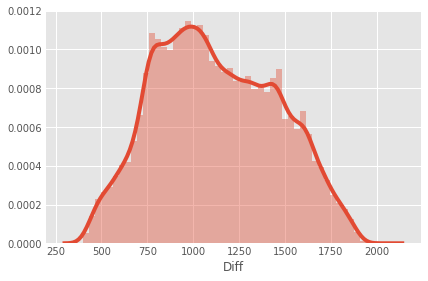

In [109]:
#df4.describe()

sb.distplot(df4['Diff'])

In [19]:
import numpy as np
import pandas as pd
from fbprophet import Prophet 
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame
from pylab import *
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator
from matplotlib.font_manager import FontProperties
from scipy import stats
from scipy.stats import norm

c = """
SELECT
--EXTRACT(YEAR FROM NL_Sub_date) as subyear,
--EXTRACT(MONTH FROM NL_Sub_date) as submonth,
diff,
COUNT(distinct regi_id) as totals, 
count(distinct case when NL_Unsub_date is not null then regi_id ELSE NULL END) as drop
FROM (
SELECT 
       regi_id,
       NL_Sub_date,
       NL_Unsub_date,
       DATE_DIFF(NL_Unsub_date, NL_Sub_date, Month) as Diff
      --Count(distinct case when NL_Sub_date is not null THEN regi_id ELSE NULL END) as SubbedThisMonth,
      --Count(distinct case when NL_Unsub_date is not null THEN regi_id ELSE NULL END) as UnsubbedThisMonth
      FROM (
              SELECT
              regi_id, 
              product_code, 
              mIN(case when is_sub = true then date(update_time) else null end) as NL_Sub_date,
              max(case when is_sub = False then date(update_time) else null end) as NL_Unsub_date
              FROM `nyt-messaging-prd.helix_email.email_user_subscriptions`
              WHERE _PARTITIONTIME >= '2016-01-01 00:00:00' AND _PARTITIONTIME < '2019-09-25 00:00:00'
              and product_code = 'CK'
              group by 1,2
           ) 
      WHERE 
              NL_Sub_date < '2017-01-01'-- >= '2018-08-01'
      GROUP BY 1,2,3,4 
      )
GROUP BY 1
"""

dff = pd.read_gbq(c,
    project_id = 'nyt-bigquery-beta-workspace',
    dialect='standard')

INFO:google.auth.compute_engine._metadata:Compute Engine Metadata server unavailable.
INFO:pandas_gbq.gbq:Requesting query... 
INFO:pandas_gbq.gbq:ok.
Query running...
INFO:pandas_gbq.gbq:Job ID: b2331ac2-e5b6-43ad-8483-0f7688cbc36f
Query running...
INFO:pandas_gbq.gbq:Got 52 rows.

INFO:pandas_gbq.gbq:Total time taken 7.41 s.
Finished at 2019-09-25 14:35:56.


In [4]:
dff.head()

,diff,totals,drop
0,16,627,627
1,22,1148,1148
2,28,3484,3484
3,35,3907,3907
4,55,1055,1055


ValueError: ignored

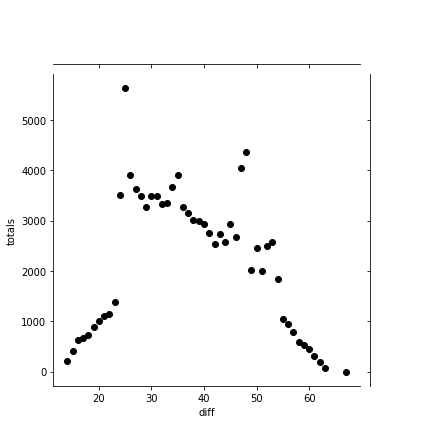

In [7]:
sb.jointplot(x="diff", y="totals", data=dff, color="k")

In [0]:
#dff1 = dff[dff['diff'] != 'None']
#dff1.dtypes
dff1 = dff[pd.to_numeric(dff['diff'], errors='coerce').notnull()]

In [0]:
dff1.plot.bar(x="diff", y="totals", rot=90)

Text(5, 4000, '2 years Out!')

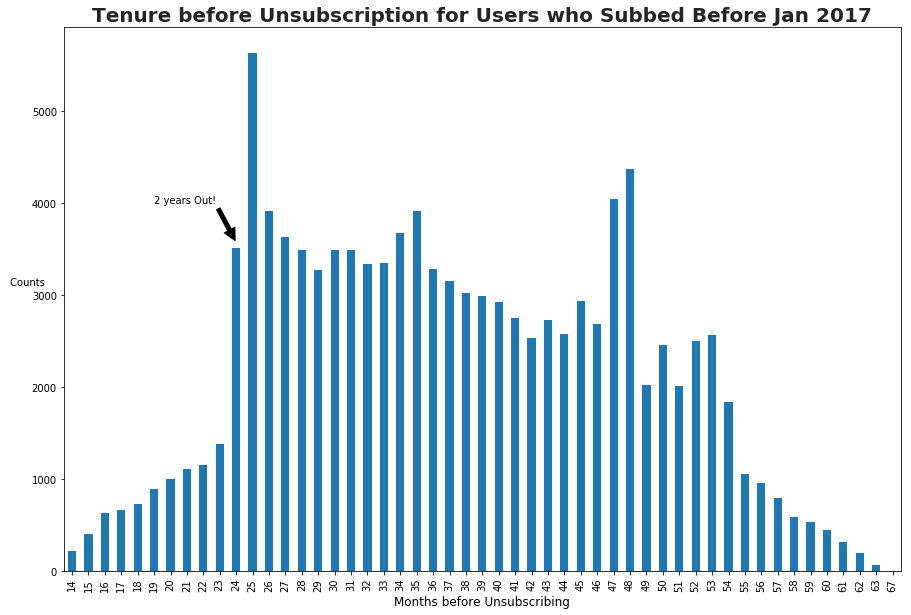

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
dff1.groupby(['diff']).sum()['totals'].plot.bar(ax=ax)
plt.title('Tenure before Unsubscription for Users who Subbed Before Jan 2017', fontsize = 20, alpha=.85, weight = 'bold')
plt.xlabel('Months before Unsubscribing', fontsize = 12)
plt.ylabel('\n Counts \n     ', rotation = 0)

plt.annotate(
# Label and coordinate
'2 years Out!', xy=(10, 3570), xytext=(5, 4000),
 
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05)
)


In [65]:
import numpy as np
import pandas as pd
from fbprophet import Prophet 
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame
from pylab import *
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator
from matplotlib.font_manager import FontProperties
from scipy import stats
from scipy.stats import norm

g = """
SELECT
--EXTRACT(YEAR FROM NL_Sub_date) as subyear,
--EXTRACT(MONTH FROM NL_Sub_date) as submonth,
diff,
COUNT(distinct regi_id) as totals, 
count(distinct case when NL_Unsub_date is not null then regi_id ELSE NULL END) as drop
FROM (
SELECT 
       regi_id,
       NL_Sub_date,
       NL_Unsub_date,
       DATE_DIFF(NL_Unsub_date, NL_Sub_date, Month) as Diff
      --Count(distinct case when NL_Sub_date is not null THEN regi_id ELSE NULL END) as SubbedThisMonth,
      --Count(distinct case when NL_Unsub_date is not null THEN regi_id ELSE NULL END) as UnsubbedThisMonth
      FROM (
              SELECT
              regi_id, 
              product_code, 
              mIN(case when is_sub = true then date(update_time) else null end) as NL_Sub_date,
              max(case when is_sub = False then date(update_time) else null end) as NL_Unsub_date
              FROM `nyt-messaging-prd.helix_email.email_user_subscriptions`
              WHERE _PARTITIONTIME >= '2016-01-01 00:00:00' AND _PARTITIONTIME < '2019-09-25 00:00:00'
              and product_code = 'CK'
              group by 1,2
           ) 
      WHERE 
              NL_Unsub_date not in ('2017-08-26','2017-08-25','2018-12-20')    -- >= '2018-08-01'
      GROUP BY 1,2,3,4 
      )
GROUP BY 1
"""

bh = pd.read_gbq(g,
    project_id = 'nyt-bigquery-beta-workspace',
    dialect='standard')

INFO:google.auth.compute_engine._metadata:Compute Engine Metadata server unavailable.
INFO:pandas_gbq.gbq:Requesting query... 
INFO:pandas_gbq.gbq:ok.
Query running...
INFO:pandas_gbq.gbq:Job ID: c6668628-003d-4612-a8ed-3bd70c71e6f8
Query running...
INFO:pandas_gbq.gbq:  Elapsed 7.31 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 10.19 s. Waiting...
INFO:pandas_gbq.gbq:Got 93 rows.

INFO:pandas_gbq.gbq:Total time taken 10.83 s.
Finished at 2019-09-25 15:11:26.


In [0]:
bh1 = bh[pd.to_numeric(bh['diff'], errors='coerce').notnull()]

bh1 = bh1[bh1['diff'] > 0]

Text(0, 0.5, '\n Counts \n \n      ')

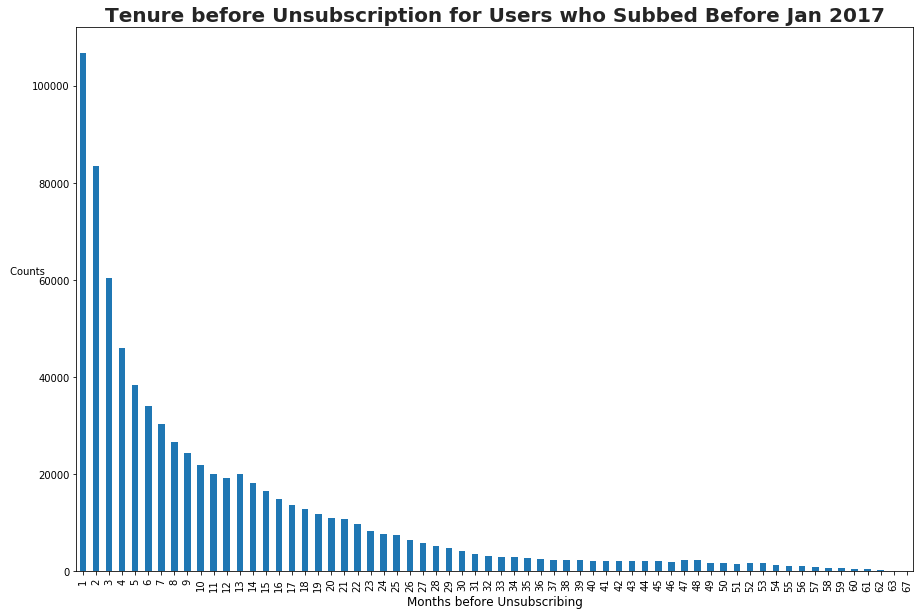

In [67]:
fig1, ax1 = plt.subplots(figsize=(15,10))
bh1.groupby(['diff']).sum()['totals'].plot.bar(ax=ax1)
plt.title('Tenure before Unsubscription for Users who Subbed Before Jan 2017', fontsize = 20, alpha=.85, weight = 'bold')
plt.xlabel('Months before Unsubscribing', fontsize = 12)
plt.ylabel('\n Counts \n \n      ', rotation = 0)